<a href="https://colab.research.google.com/github/solecoded/TelecomX_P1/blob/main/TelecomX_LATAM_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [22]:
import pandas as pd
import requests
import json

# URL del archivo JSON en GitHub
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realizar una solicitud GET a la URL para obtener los datos
response = requests.get(url_api)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Cargar el contenido JSON
    datos_json = response.json()

    # Convertir el JSON a un DataFrame de Pandas
    df = pd.DataFrame(datos_json)

    print("Datos cargados exitosamente en un DataFrame.")
    print("Primeras 5 filas del DataFrame:")
    print(df.head())
    # print(df.info())
else:
    print(f"Error al cargar los datos. Código de estado: {response.status_code}")

Datos cargados exitosamente en un DataFrame.
Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecu

#🔧 Transformación

In [23]:
# Muestra un resumen conciso del DataFrame
df.info()

# Muestra el tipo de dato de cada columna
print("\nTipos de datos de cada columna:")
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


In [24]:
# Aplanando la columna 'customer' y uniendo los resultados
df = pd.concat([df, pd.json_normalize(df['customer'])], axis=1)

# Aplanando la columna 'phone' y uniendo los resultados
df = pd.concat([df, pd.json_normalize(df['phone'])], axis=1)

# Aplanando la columna 'internet' y uniendo los resultados
df = pd.concat([df, pd.json_normalize(df['internet'])], axis=1)

# Aplanando la columna 'account' y uniendo los resultados
df = pd.concat([df, pd.json_normalize(df['account'])], axis=1)

# Mostramos el resultado para que veas todas las columnas.
print("DataFrame con columnas aplanadas y originales:")
# df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)
print(df.info())

DataFrame con columnas aplanadas y originales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   customer          7267 non-null   object 
 3   phone             7267 non-null   object 
 4   internet          7267 non-null   object 
 5   account           7267 non-null   object 
 6   gender            7267 non-null   object 
 7   SeniorCitizen     7267 non-null   int64  
 8   Partner           7267 non-null   object 
 9   Dependents        7267 non-null   object 
 10  tenure            7267 non-null   int64  
 11  PhoneService      7267 non-null   object 
 12  MultipleLines     7267 non-null   object 
 13  InternetService   7267 non-null   object 
 14  OnlineSecurity    7267 non-null   object 
 15  OnlineBackup      7267 non-null   object 


In [25]:
# Mapear los nombres de las columnas a sus traducciones
columnas_traducidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Churn',
    'customer': 'Cliente',
    'phone': 'Telefono',
    'internet': 'Internet',
    'account': 'Cuenta',
    'gender': 'Genero',
    'SeniorCitizen': 'Adulto_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Permanencia_Meses',
    'PhoneService': 'Servicio_Telefonico',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Respaldo_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Facturacion_Sin_Papel',
    'PaymentMethod': 'Metodo_de_Pago',
    'Charges.Monthly': 'Cargos_Mensuales',
    'Charges.Total': 'Cargos_Totales'
}

# Renombrar las columnas del DataFrame
df = df.rename(columns=columnas_traducidas)

# Opcional: imprimir las nuevas columnas para verificar
print(df.columns)

Index(['ID_Cliente', 'Churn', 'Cliente', 'Telefono', 'Internet', 'Cuenta',
       'Genero', 'Adulto_Mayor', 'Pareja', 'Dependientes', 'Permanencia_Meses',
       'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet',
       'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
       'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas',
       'Tipo_Contrato', 'Facturacion_Sin_Papel', 'Metodo_de_Pago',
       'Cargos_Mensuales', 'Cargos_Totales'],
      dtype='object')


In [26]:
# Convierte la columna 'Cargos.Totales' a un tipo numérico, forzando los errores a NaN
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce')

# Ahora, verifica si hay valores nulos en el DataFrame
print("Valores nulos después de la conversión:")
print(df.isnull().sum())

# Como son pocos, una estrategia común es eliminar las filas con nulos en esta columna
df.dropna(subset=['Cargos_Totales'], inplace=True)

# Finalmente, verifica que la columna ahora es de tipo numérico y que ya no hay nulos en ella
print("\nVerificación final:")
df.info()

Valores nulos después de la conversión:
ID_Cliente                 0
Churn                      0
Cliente                    0
Telefono                   0
Internet                   0
Cuenta                     0
Genero                     0
Adulto_Mayor               0
Pareja                     0
Dependientes               0
Permanencia_Meses          0
Servicio_Telefonico        0
Multiples_Lineas           0
Servicio_Internet          0
Seguridad_Online           0
Respaldo_Online            0
Proteccion_Dispositivo     0
Soporte_Tecnico            0
Streaming_TV               0
Streaming_Peliculas        0
Tipo_Contrato              0
Facturacion_Sin_Papel      0
Metodo_de_Pago             0
Cargos_Mensuales           0
Cargos_Totales            11
dtype: int64

Verificación final:
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -

In [27]:
# Tasa de CHURN
# Muestra la tasa de Churn en porcentajes
tasa_churn = df['Churn'].value_counts(normalize=True) * 100

print("Tasa de evasión de clientes:")
print(tasa_churn)

# También puedes ver la distribución de una variable categórica para empezar a identificar patrones
print("\nDistribución de clientes por tipo de contrato:")
print(df['Tipo_Contrato'].value_counts(normalize=True) * 100)

Tasa de evasión de clientes:
Churn
No     71.154906
Yes    25.757993
        3.087100
Name: proportion, dtype: float64

Distribución de clientes por tipo de contrato:
Tipo_Contrato
Month-to-month    55.195700
Two year          23.883682
One year          20.920617
Name: proportion, dtype: float64


In [28]:
# Filtra el DataFrame para encontrar las filas donde la columna 'Churn'
# no sea igual a 'No' y tampoco sea igual a 'Yes'
filas_con_churn_invalido = df[~df['Churn'].isin(['Yes', 'No'])]

print("Filas con valores inconsistentes en la columna 'Churn':")
print(filas_con_churn_invalido)

Filas con valores inconsistentes en la columna 'Churn':
      ID_Cliente Churn                                            Cliente  \
30    0047-ZHDTW        {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
75    0120-YZLQA        {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
96    0154-QYHJU        {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
98    0162-RZGMZ        {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   
175   0274-VVQOQ        {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
...          ...   ...                                                ...   
7158  9840-GSRFX        {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7180  9872-RZQQB        {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7211  9920-GNDMB        {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
7239  9955-RVWSC        {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
7247  9966-VYRTZ        {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   

                   

In [29]:
# Reemplaza cualquier valor que no sea 'Yes' o 'No' con NaN
# Esto es más seguro que buscar un valor específico, ya que cubre cualquier inconsistencia
df['Churn'] = df['Churn'].apply(lambda x: x if x in ['Yes', 'No'] else None)

# Ahora, elimina las filas con valores nulos en la columna 'Churn'
df.dropna(subset=['Churn'], inplace=True)

# Finalmente, verifica que la limpieza se haya realizado correctamente
# y vuelve a calcular la tasa de churn
print("Verificación de la limpieza:")
df.info()

print("\nNueva tasa de evasión de clientes:")
print(df['Churn'].value_counts(normalize=True) * 100)

Verificación de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Churn                   7032 non-null   object 
 2   Cliente                 7032 non-null   object 
 3   Telefono                7032 non-null   object 
 4   Internet                7032 non-null   object 
 5   Cuenta                  7032 non-null   object 
 6   Genero                  7032 non-null   object 
 7   Adulto_Mayor            7032 non-null   int64  
 8   Pareja                  7032 non-null   object 
 9   Dependientes            7032 non-null   object 
 10  Permanencia_Meses       7032 non-null   int64  
 11  Servicio_Telefonico     7032 non-null   object 
 12  Multiples_Lineas        7032 non-null   object 
 13  Servicio_Internet       7032 non-null   object 
 14  Seguridad_Online

In [30]:
# Cuentas Diarias
# Crea la nueva columna "Cuentas_Diarias"
df['Cuentas_Diarias'] = df['Cargos_Mensuales'] / 30

# Verifica que la nueva columna se haya creado correctamente
print("DataFrame con la nueva columna 'Cuentas_Diarias':")
print(df[['Cargos_Mensuales', 'Cuentas_Diarias']].head())

DataFrame con la nueva columna 'Cuentas_Diarias':
   Cargos_Mensuales  Cuentas_Diarias
0              65.6         2.186667
1              59.9         1.996667
2              73.9         2.463333
3              98.0         3.266667
4              83.9         2.796667


In [32]:
# Para la columna 'Genero', que es 'Female'/'Male', la convertimos a 0/1 (0: Hombre, 1: Mujer)
# Asegurarnos de que la columna 'Genero' existe antes de intentar mapear
if 'Genero' in df.columns:
    # Mapeo directo a 0/1. La convención es que 'Male' puede ser 0 y 'Female' 1
    # Se ajusta el mapeo para que coincida con los valores reales 'Female' y 'Male'
    genero_mapping = {'Male': 0, 'Female': 1}
    df['Genero'] = df['Genero'].replace(genero_mapping)

    # Después de mapear, convertir a tipo entero para asegurar que es binario (0 o 1)
    # Ya que todos los valores ahora serán 0 o 1, esta conversión será exitosa.
    df['Genero'] = df['Genero'].astype(int)

# El resto de tu código
# ... (las otras transformaciones están bien)

# Verifica los cambios en las columnas convertidas
print("\nDataFrame después de convertir columnas a 1/0 y manejar casos especiales:")
print(df[['Genero', 'Pareja', 'Churn', 'Multiples_Lineas', 'Servicio_Internet', 'Adulto_Mayor']].head())

# Verificación final de tipos de datos
print("\nVerificación final de tipos de datos:")
df.info()


DataFrame después de convertir columnas a 1/0 y manejar casos especiales:
   Genero  Pareja  Churn  Multiples_Lineas  Servicio_Internet  Adulto_Mayor
0       1       1      0                 0                  1             0
1       0       0      0                 1                  1             0
2       0       0      1                 0                  1             0
3       0       1      1                 0                  1             1
4       1       1      1                 0                  1             1

Verificación final de tipos de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              7032 non-null   object 
 1   Churn                   7032 non-null   Int64  
 2   Cliente                 7032 non-null   object 
 3   Telefono                7032 non-null   object 
 4   Inter

/tmp/ipython-input-1497476772.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Genero'] = df['Genero'].replace(genero_mapping)


In [33]:
# Mapear los valores de la columna 'Tipo_Contrato' a español
traduccion_contratos = {
    'Month-to-month': 'Mes a mes',
    'One year': 'Un año',
    'Two year': 'Dos años'
}

# Reemplaza los valores en la columna 'Tipo_Contrato'
df['Tipo_Contrato'] = df['Tipo_Contrato'].replace(traduccion_contratos)

# Muestra los nuevos valores para verificar la traducción
print("Valores únicos en 'Tipo_Contrato' después de la traducción:")
print(df['Tipo_Contrato'].unique())


# Muestra la tasa de Churn por tipo de contrato en porcentajes

churn_por_contrato = pd.crosstab(df['Tipo_Contrato'], df['Churn'], normalize='index') * 100

print("Tasa de abandono (Churn) por tipo de contrato:")

print(churn_por_contrato)



Valores únicos en 'Tipo_Contrato' después de la traducción:
['Un año' 'Mes a mes' 'Dos años']
Tasa de abandono (Churn) por tipo de contrato:
Churn                  0          1
Tipo_Contrato                      
Dos años       97.151335   2.848665
Mes a mes      57.290323  42.709677
Un año         88.722826  11.277174


In [34]:
# Mapeo de valores originales a sus traducciones
traducciones_metodo_pago = {
    'Electronic check': 'Cheque electrónico',
    'Mailed check': 'Cheque enviado por correo',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)',
    'Credit card (automatic)': 'Tarjeta de crédito (automática)'
}

# Reemplazar los valores en la columna 'Metodo_de_Pago'
df['Metodo_de_Pago'] = df['Metodo_de_Pago'].replace(traducciones_metodo_pago)

# Opcional: verificar los nuevos valores
print("Distribución de la columna 'Metodo_de_Pago' después de la traducción:")
print(df['Metodo_de_Pago'].value_counts(normalize=True) * 100)

Distribución de la columna 'Metodo_de_Pago' después de la traducción:
Metodo_de_Pago
Cheque electrónico                     33.631968
Cheque enviado por correo              22.810011
Transferencia bancaria (automática)    21.928328
Tarjeta de crédito (automática)        21.629693
Name: proportion, dtype: float64


In [35]:

# Ejecuta el análisis para ver el gráfico con las etiquetas en español
churn_por_pago = pd.crosstab(df['Metodo_de_Pago'], df['Churn'], normalize='index') * 100

print("Tasa de Churn por método de pago (en español):")
print(churn_por_pago)

Tasa de Churn por método de pago (en español):
Churn                                        0          1
Metodo_de_Pago                                           
Cheque electrónico                   54.714588  45.285412
Cheque enviado por correo            80.798005  19.201995
Tarjeta de crédito (automática)      84.746877  15.253123
Transferencia bancaria (automática)  83.268482  16.731518


In [36]:
import pandas as pd

# Muestra todas las filas del DataFrame
pd.set_option('display.max_rows', None)

# Agrupa los datos por antigüedad y estado de Churn
distribucion_antiguedad = df.groupby(['Permanencia_Meses', 'Churn']).size().unstack(fill_value=0)

# Renombra las columnas para mayor claridad
distribucion_antiguedad.columns = ['Clientes que se quedan', 'Clientes que se van']

print(distribucion_antiguedad)

# Opcional: Para volver a la configuración por defecto de pandas
# pd.reset_option('display.max_rows')

                   Clientes que se quedan  Clientes que se van
Permanencia_Meses                                             
1                                     233                  380
2                                     115                  123
3                                     106                   94
4                                      93                   83
5                                      69                   64
6                                      70                   40
7                                      80                   51
8                                      81                   42
9                                      73                   46
10                                     71                   45
11                                     68                   31
12                                     79                   38
13                                     71                   38
14                                     52              

#📊 Carga y análisis

1.- Análisis descriptivo

In [37]:
# Muestra estadísticas descriptivas para las columnas numéricas
print("Análisis Descriptivo de variables numéricas:")
print(df.describe())

# Muestra la distribución de las variables categóricas clave
print("\nAnálisis Descriptivo de variables categóricas:")
for col in ['Genero', 'Pareja', 'Dependientes', 'Tipo_Contrato', 'Metodo_de_Pago']:
    print(f"\nDistribución de la columna '{col}':")
    print(df[col].value_counts(normalize=True) * 100)

Análisis Descriptivo de variables numéricas:
          Churn       Genero  Adulto_Mayor       Pareja  Dependientes  \
count    7032.0  7032.000000   7032.000000  7032.000000   7032.000000   
mean   0.265785     0.495307      0.162400     0.482509      0.298493   
std    0.441782     0.500014      0.368844     0.499729      0.457629   
min         0.0     0.000000      0.000000     0.000000      0.000000   
25%         0.0     0.000000      0.000000     0.000000      0.000000   
50%         0.0     0.000000      0.000000     0.000000      0.000000   
75%         1.0     1.000000      0.000000     1.000000      1.000000   
max         1.0     1.000000      1.000000     1.000000      1.000000   

       Permanencia_Meses  Servicio_Telefonico  Multiples_Lineas  \
count        7032.000000          7032.000000       7032.000000   
mean           32.421786             0.903299          0.421928   
std            24.545260             0.295571          0.493902   
min             1.000000     

2.- Recuento de evasión por variables categóricas

Tasa de Churn por método de pago:
Churn                                        0          1
Metodo_de_Pago                                           
Cheque electrónico                   54.714588  45.285412
Cheque enviado por correo            80.798005  19.201995
Tarjeta de crédito (automática)      84.746877  15.253123
Transferencia bancaria (automática)  83.268482  16.731518


/tmp/ipython-input-1760007142.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=churn_por_pago.index, y=churn_por_pago[1], palette='viridis')


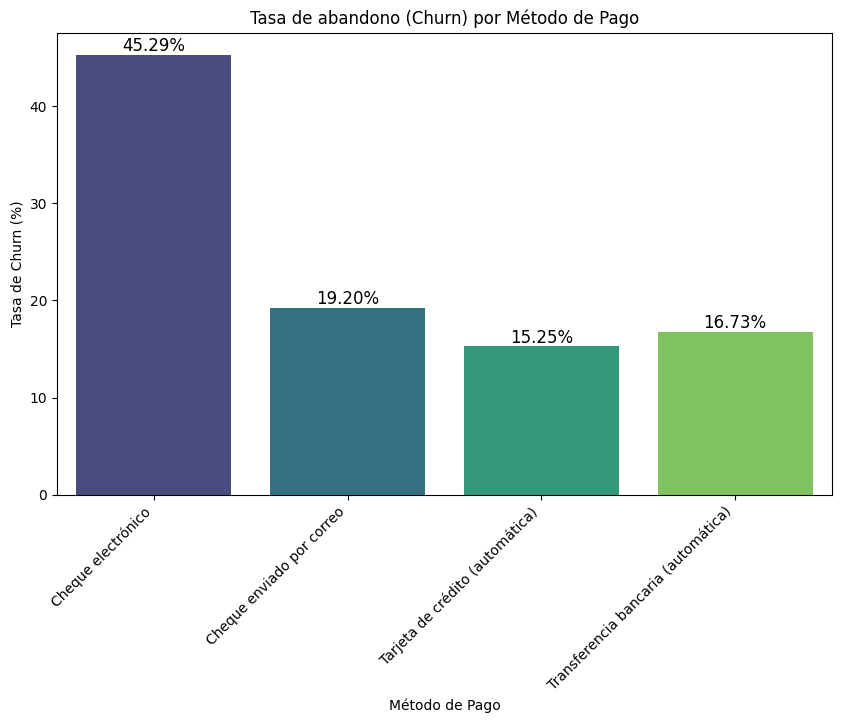

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crea una tabla cruzada para ver el Churn por método de pago
churn_por_pago = pd.crosstab(df['Metodo_de_Pago'], df['Churn'], normalize='index') * 100

print("Tasa de Churn por método de pago:")
print(churn_por_pago)

# Crea un gráfico de barras para visualizar la tasa de churn con etiquetas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=churn_por_pago.index, y=churn_por_pago[1], palette='viridis')
plt.title('Tasa de abandono (Churn) por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Tasa de Churn (%)')
plt.xticks(rotation=45, ha='right')

# Añade etiquetas de texto a cada barra
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(),
            f'{p.get_height():.2f}%',
            fontsize=12, color='black', ha='center', va='bottom')

plt.show()

/tmp/ipython-input-1700820411.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='Permanencia_Meses', data=df_plot, palette='viridis')


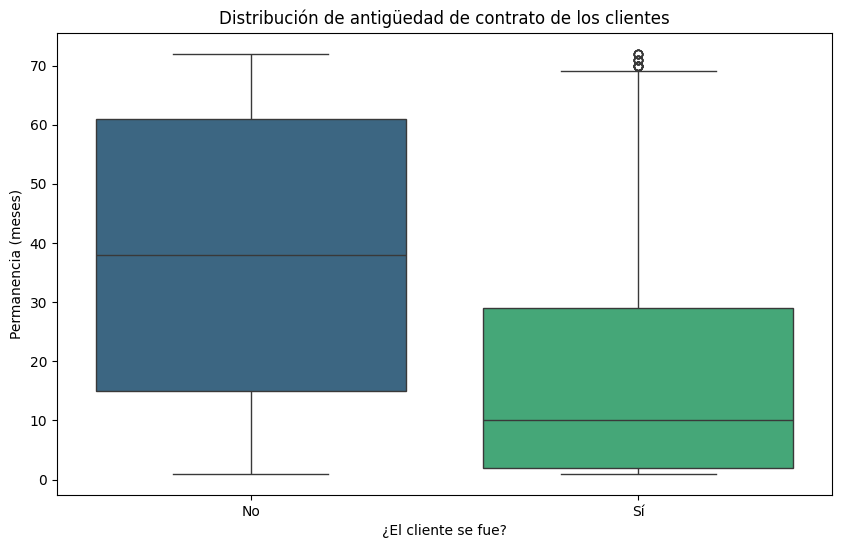

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia del DataFrame para el gráfico
df_plot = df.copy()

# Mapeamos los valores numéricos a etiquetas de texto
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'No', 1: 'Sí'})

# Crea un gráfico de caja para visualizar la distribución de 'tenure' por 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Label', y='Permanencia_Meses', data=df_plot, palette='viridis')
plt.title('Distribución de antigüedad de contrato de los clientes')
plt.xlabel('¿El cliente se fue?')
plt.ylabel('Permanencia (meses)')
plt.show()

In [40]:
# Muestra estadísticas descriptivas para la antigüedad, separada por Churn
print("Estadísticas descriptivas de la antigüedad por grupo de Churn:")
print(df.groupby('Churn')['Permanencia_Meses'].describe())

Estadísticas descriptivas de la antigüedad por grupo de Churn:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0


/tmp/ipython-input-1065507710.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn_Label', y='Cargos_Mensuales', data=df_plot, palette='viridis')


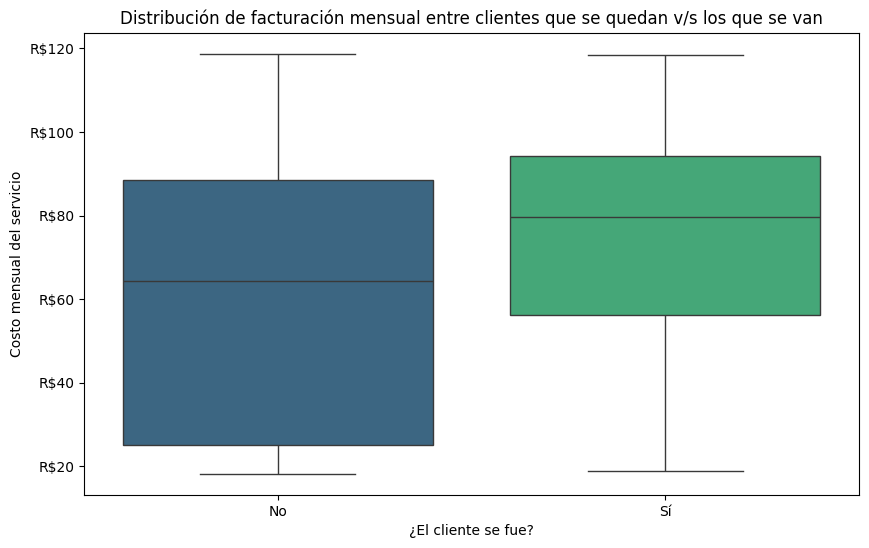

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Creamos una copia del DataFrame para el gráfico
df_plot = df.copy()

# Mapeamos los valores numéricos a etiquetas de texto
df_plot['Churn_Label'] = df_plot['Churn'].map({0: 'No', 1: 'Sí'})

# Crea un gráfico de caja para visualizar la distribución de 'Charges.Monthly' por 'Churn'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn_Label', y='Cargos_Mensuales', data=df_plot, palette='viridis')

# Formatea el eje Y para que muestre el símbolo de reales
formatter = mtick.StrMethodFormatter('R${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Distribución de facturación mensual entre clientes que se quedan v/s los que se van')
plt.xlabel('¿El cliente se fue?')
plt.ylabel('Costo mensual del servicio') # La etiqueta del eje ahora no necesita la moneda
plt.show()

In [43]:
print("Estadísticas descriptivas de la facturación mensual por Churn:")
print(df.groupby('Churn')['Cargos_Mensuales'].describe())

Estadísticas descriptivas de la facturación mensual por Churn:
        count       mean        std    min    25%    50%     75%     max
Churn                                                                   
0      5163.0  61.307408  31.094557  18.25  25.10  64.45  88.475  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.65  94.200  118.35


In [44]:
import pandas as pd

# Filtramos a los clientes que no abandonaron (Churn == 0),
# luego agrupamos por tipo de contrato y calculamos la mediana
# de la facturación mensual.
medianas_por_contrato = df[df['Churn'] == 0].groupby('Tipo_Contrato')['Cargos_Mensuales'].median()

print(medianas_por_contrato)


Tipo_Contrato
Dos años     63.55
Mes a mes    64.95
Un año       64.85
Name: Cargos_Mensuales, dtype: float64


In [45]:
# Calcular la mediana de la facturación mensual para los clientes que se fueron (Churn == 1)
mediana_churners = df[df['Churn'] == 1]['Cargos_Mensuales'].median()

# Calcular la mediana de la facturación mensual para los clientes que se quedaron (Churn == 0)
mediana_no_churners = df[df['Churn'] == 0]['Cargos_Mensuales'].median()

# Calcular la mediana de la facturación mensual para los clientes que se quedaron, agrupados por contrato
medianas_por_contrato = df[df['Churn'] == 0].groupby('Tipo_Contrato')['Cargos_Mensuales'].median()

# Imprimir todos los resultados para su verificación
print("Mediana de facturación para clientes que se fueron:", mediana_churners)
print("Mediana de facturación para clientes que se quedaron:", mediana_no_churners)
print("\nMediana de facturación por tipo de contrato (solo clientes que se quedaron):\n", medianas_por_contrato)

# Filtramos a los clientes que abandonaron (Churn == 1),
# luego agrupamos por tipo de contrato y calculamos la mediana
# de la facturación mensual.
medianas_por_contrato_churn = df[df['Churn'] == 1].groupby('Tipo_Contrato')['Cargos_Mensuales'].median()

print(medianas_por_contrato_churn)

Mediana de facturación para clientes que se fueron: 79.65
Mediana de facturación para clientes que se quedaron: 64.45

Mediana de facturación por tipo de contrato (solo clientes que se quedaron):
 Tipo_Contrato
Dos años     63.55
Mes a mes    64.95
Un año       64.85
Name: Cargos_Mensuales, dtype: float64
Tipo_Contrato
Dos años     97.275
Mes a mes    79.050
Un año       95.050
Name: Cargos_Mensuales, dtype: float64


In [ ]:
df.info()

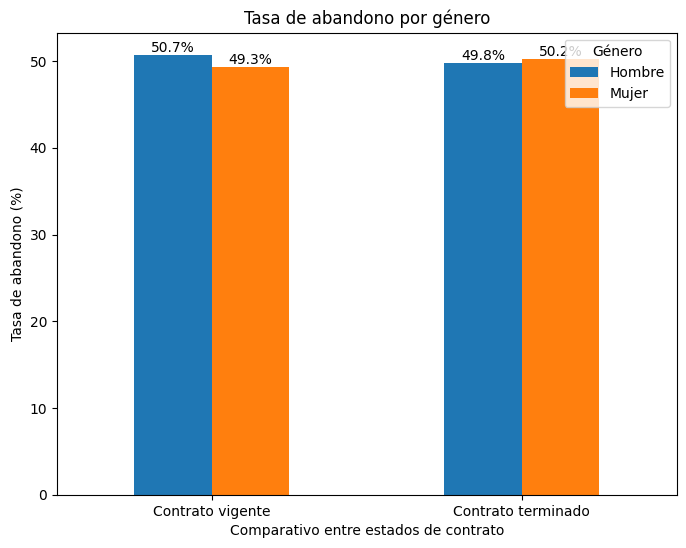

Tabla con las tasas de abandono por género:
Genero          0          1
Churn                       
0       50.726322  49.273678
1       49.759230  50.240770


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla cruzada para obtener las tasas de abandono por género
churn_por_genero = pd.crosstab(df['Churn'],df['Genero'], normalize='index') * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(8, 6))
churn_por_genero.plot(kind='bar', rot=0, ax=ax)

# Configurar el gráfico
plt.title('Tasa de abandono por género')
plt.xlabel('Comparativo entre estados de contrato')
plt.ylabel('Tasa de abandono (%)')
plt.legend(title='Género', labels=['Hombre', 'Mujer'], loc='upper right')
# Añadir etiquetas al eje X
ax.set_xticklabels(['Contrato vigente', 'Contrato terminado'])

# Valor etiqueas
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Mostrar el gráfico
plt.show()

print("Tabla con las tasas de abandono por género:")
print(churn_por_genero)

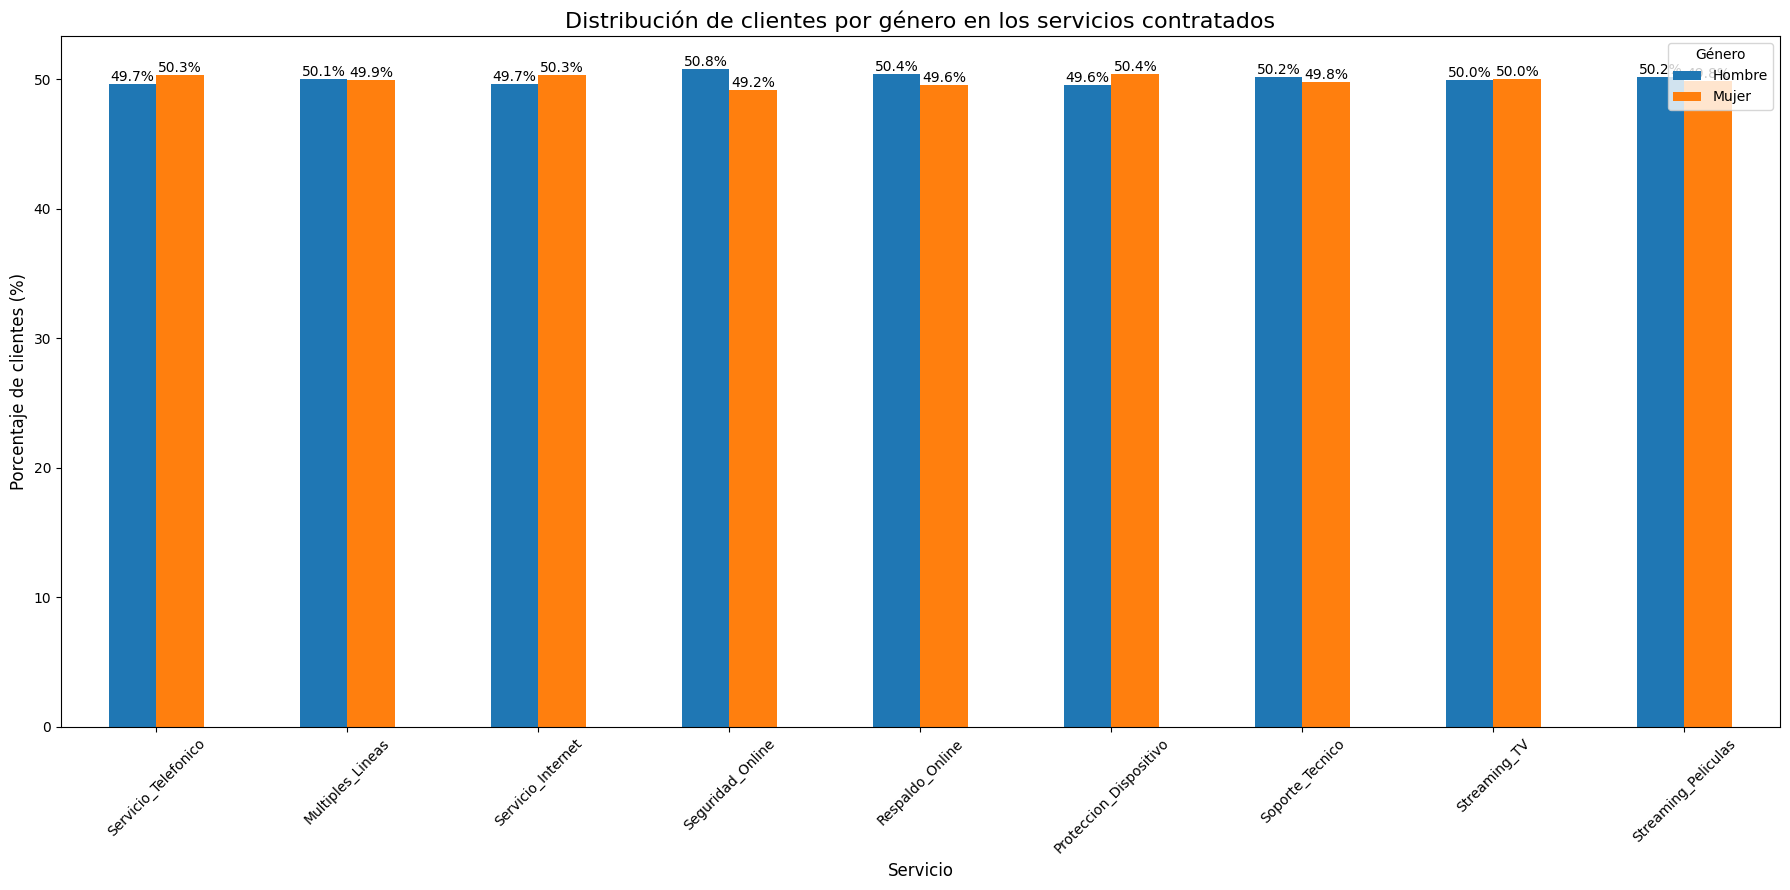

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres de los géneros de tu DataFrame de forma dinámica
nombres_genero = df['Genero'].unique()

# Lista de los servicios a analizar
servicios = [
    'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas'
]

# Inicializar un DataFrame para guardar los resultados
df_comparativo = pd.DataFrame()

# Iterar sobre cada servicio
for servicio in servicios:
    # Filtra los clientes que SÍ tienen el servicio (donde el valor es 1)
    df_servicio = df[df[servicio] == 1]

    # Si hay clientes, calcula la distribución de género
    if not df_servicio.empty:
        distribucion = df_servicio['Genero'].value_counts(normalize=True) * 100
        df_comparativo[servicio] = distribucion.reindex(nombres_genero)

# Transponer el DataFrame
df_comparativo = df_comparativo.T
df_comparativo.index.name = 'Servicio'

# Renombrar las columnas de los géneros para el gráfico
# Mapea los nombres de género que encontró el código a 'Hombre' y 'Mujer'
if len(nombres_genero) == 2:
    mapeo_genero = {nombres_genero[0]: 'Hombre', nombres_genero[1]: 'Mujer'}
    df_comparativo = df_comparativo.rename(columns=mapeo_genero)

# Crear el gráfico de barras
if not df_comparativo.empty:
    fig, ax = plt.subplots(figsize=(18, 9))
    df_comparativo.plot(kind='bar', rot=45, ax=ax)

    # Configurar el gráfico
    plt.title('Distribución de clientes por género en los servicios contratados', fontsize=16)
    plt.xlabel('Servicio', fontsize=12)
    plt.ylabel('Porcentaje de clientes (%)', fontsize=12)
    plt.legend(title='Género', loc='upper right')

    # Añadir etiquetas de valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame está vacío. No se pudo generar el gráfico.")

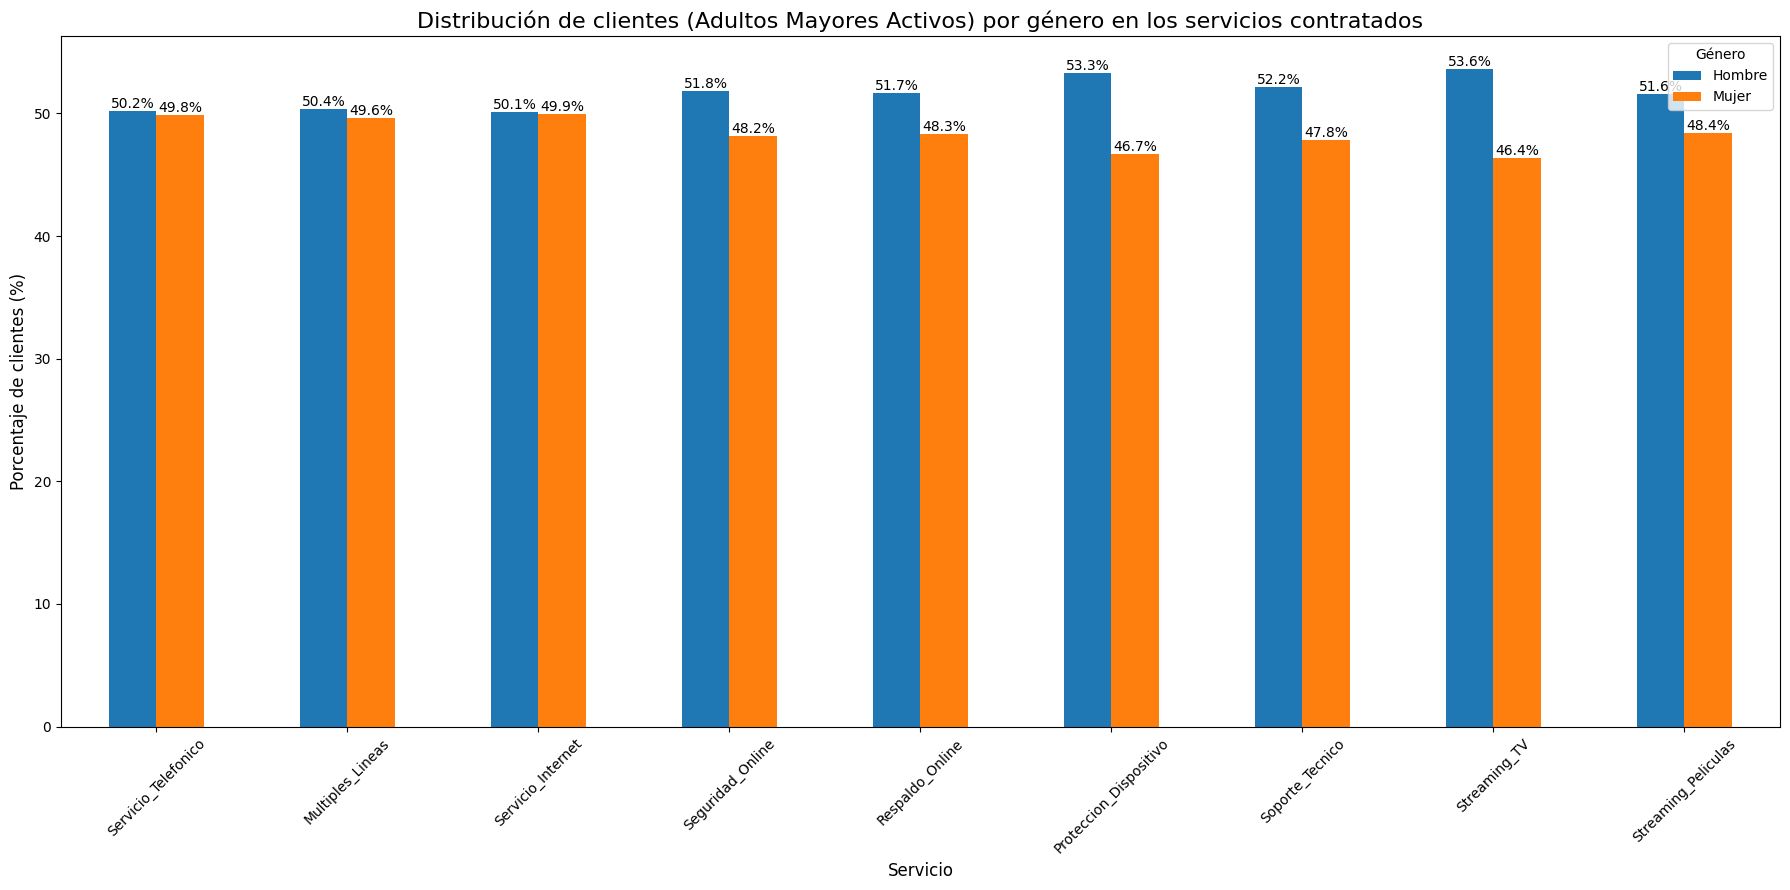

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los nombres de los géneros de tu DataFrame de forma dinámica
nombres_genero = df['Genero'].unique()

# Lista de los servicios a analizar
servicios = [
    'Servicio_Telefonico', 'Multiples_Lineas', 'Servicio_Internet',
    'Seguridad_Online', 'Respaldo_Online', 'Proteccion_Dispositivo',
    'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas'
]

# Inicializar un DataFrame para guardar los resultados
df_comparativo = pd.DataFrame()

# Iterar sobre cada servicio
for servicio in servicios:
    # Filtra los clientes que SÍ tienen el servicio (donde el valor es 1)
    # Y que tienen un contrato vigente (Churn == 0)
    # Y que son Adulto_Mayor (Adulto_Mayor == 1)
    df_servicio = df[(df[servicio] == 1) & (df['Churn'] == 0) & (df['Adulto_Mayor'] == 1)]


    # Si hay clientes, calcula la distribución de género
    if not df_servicio.empty:
        distribucion = df_servicio['Genero'].value_counts(normalize=True) * 100
        df_comparativo[servicio] = distribucion.reindex(nombres_genero)

# Transponer el DataFrame
df_comparativo = df_comparativo.T
df_comparativo.index.name = 'Servicio'

# Renombrar las columnas de los géneros para el gráfico
# Mapea los nombres de género que encontró el código a 'Hombre' y 'Mujer'
if len(nombres_genero) == 2:
    mapeo_genero = {nombres_genero[0]: 'Hombre', nombres_genero[1]: 'Mujer'}
    df_comparativo = df_comparativo.rename(columns=mapeo_genero)

# Crear el gráfico de barras
if not df_comparativo.empty:
    fig, ax = plt.subplots(figsize=(18, 9))
    df_comparativo.plot(kind='bar', rot=45, ax=ax)

    # Configurar el gráfico
    plt.title('Distribución de clientes (Adultos Mayores Activos) por género en los servicios contratados', fontsize=16)
    plt.xlabel('Servicio', fontsize=12)
    plt.ylabel('Porcentaje de clientes (%)', fontsize=12)
    plt.legend(title='Género', loc='upper right')

    # Añadir etiquetas de valor
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame está vacío. No se pudo generar el gráfico.")

Clientes con contrato vigente

#📄Informe final

In [ ]:
# Filtra el DataFrame para incluir solo a los clientes que son Adulto_Mayor
df_adultos_mayores = df[df['Adulto_Mayor'] == 1]

# Cuenta la distribución de Churn (contrato vigente vs. contrato terminado)
# para este grupo de clientes Adulto_Mayor
distribucion_churn_adultos_mayores = df_adultos_mayores['Churn'].value_counts()

# Renombra el índice para mayor claridad
distribucion_churn_adultos_mayores.index = ['Contrato vigente' if x == 0 else 'Contrato terminado' for x in distribucion_churn_adultos_mayores.index]

print("Distribución de clientes Adulto Mayor por estado de contrato:")
print(distribucion_churn_adultos_mayores)

In [ ]:
# Filtra el DataFrame para incluir solo a los clientes que son Adulto_Mayor
df_adultos_mayores = df[df['Adulto_Mayor'] == 1]

# Muestra la distribución de los tipos de contrato para este grupo
print("Distribución de tipos de contrato para clientes Adulto Mayor:")
print(df_adultos_mayores['Tipo_Contrato'].value_counts(normalize=True) * 100)

In [ ]:
# Filtra el DataFrame para incluir solo a los clientes que son Adulto_Mayor
df_adultos_mayores = df[df['Adulto_Mayor'] == 1]

# Cuenta la distribución de Churn (contrato vigente vs. contrato terminado)
# para este grupo de clientes Adulto_Mayor
distribucion_churn_adultos_mayores = df_adultos_mayores['Churn'].value_counts()

# Renombra el índice para mayor claridad
distribucion_churn_adultos_mayores.index = ['Contrato vigente' if x == 0 else 'Contrato terminado' for x in distribucion_churn_adultos_mayores.index]

print("Distribución de clientes Adulto Mayor por estado de contrato:")
print(distribucion_churn_adultos_mayores)

In [ ]:
import pandas as pd
import requests
import json

# URL del archivo JSON en GitHub
url_api = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realizar una solicitud GET a la URL para obtener los datos
response = requests.get(url_api)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Cargar el contenido JSON
    datos_json = response.json()

    # Convertir el JSON a un DataFrame de Pandas
    df_original = pd.DataFrame(datos_json)

    print("Datos originales cargados exitosamente en un nuevo DataFrame (df_original).")
    print("Primeras 5 filas del DataFrame original:")
    print(df_original.head())

    # Aplanar la columna 'customer' para acceder a 'SeniorCitizen'
    df_original = pd.concat([df_original, pd.json_normalize(df_original['customer'])], axis=1)

    # Ahora podemos trabajar con la columna 'SeniorCitizen' directamente desde df_original
    print("\nDistribución de SeniorCitizen en el DataFrame original:")
    print(df_original['SeniorCitizen'].value_counts())

    # Analizar la relación entre SeniorCitizen y Churn en el DataFrame original
    print("\nDistribución de Churn por SeniorCitizen en el DataFrame original:")
    print(pd.crosstab(df_original['SeniorCitizen'], df_original['Churn']))

else:
    print(f"Error al cargar los datos. Código de estado: {response.status_code}")

In [ ]:
# Filtra el DataFrame para incluir solo a los clientes que son Adulto_Mayor
df_adultos_mayores = df[df['Adulto_Mayor'] == 1]

# Cuenta la distribución de Churn (contrato vigente vs. contrato terminado)
# para este grupo de clientes Adulto_Mayor
distribucion_churn_adultos_mayores = df_adultos_mayores['Churn'].value_counts()

# Renombra el índice para mayor claridad
distribucion_churn_adultos_mayores.index = ['Contrato vigente' if x == 0 else 'Contrato terminado' for x in distribucion_churn_adultos_mayores.index]

print("Distribución de clientes Adulto Mayor por estado de contrato:")
print(distribucion_churn_adultos_mayores)

In [ ]:
# Verificar los valores únicos y su conteo en la columna 'Adulto_Mayor'
print("Distribución de valores en la columna 'Adulto_Mayor' después de la limpieza:")
print(df['Adulto_Mayor'].value_counts(dropna=False)) # Incluir conteo de posibles NaN